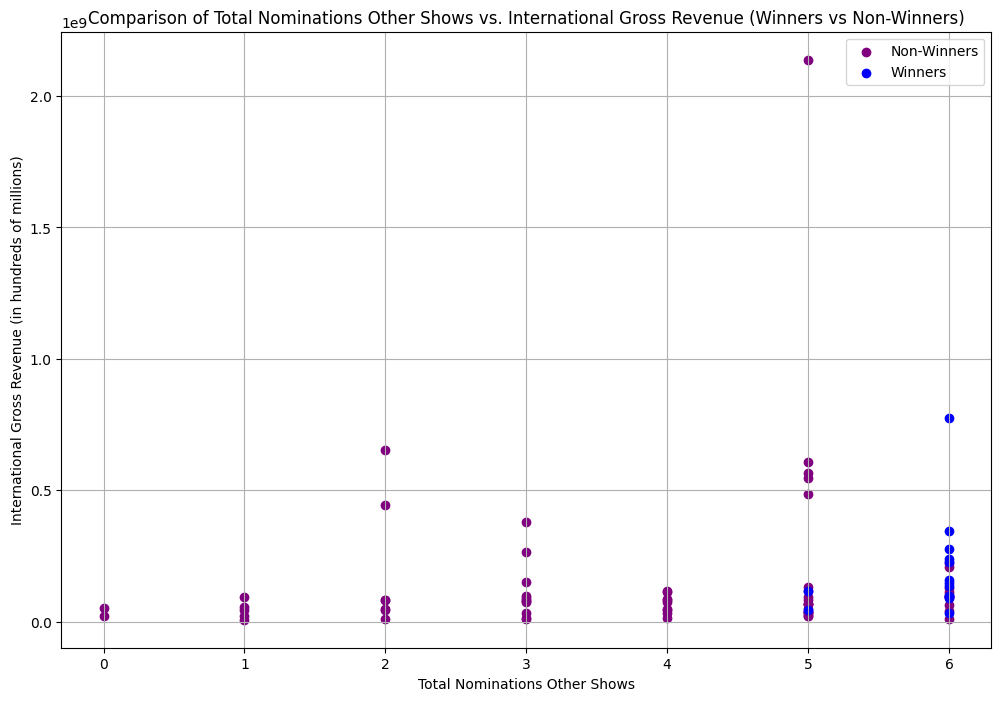

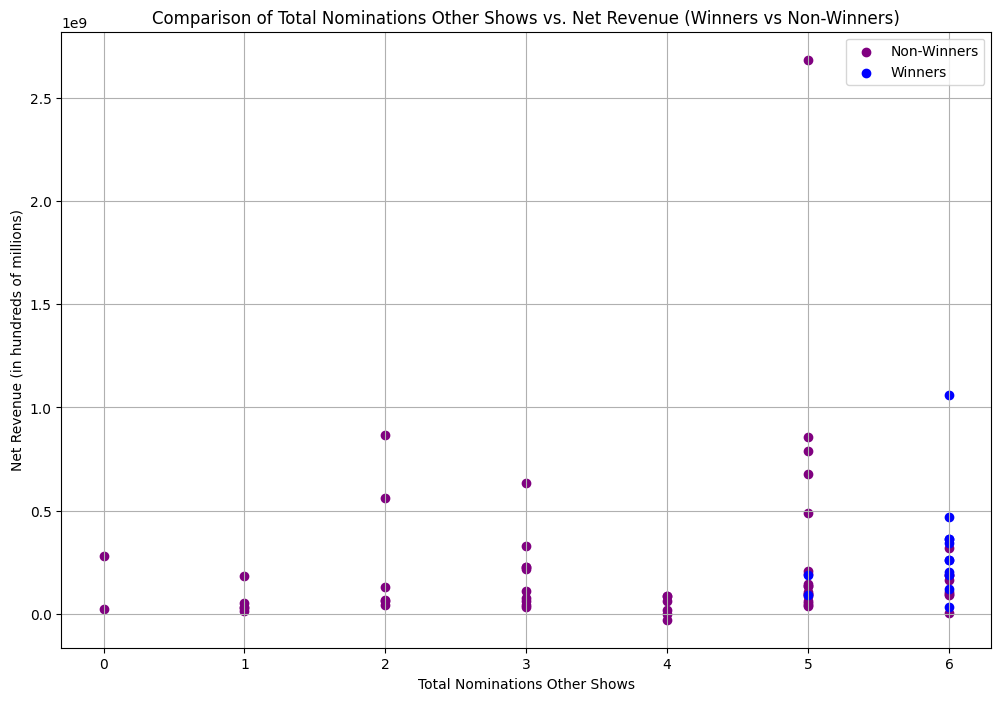

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
ana_cleaned_data = pd.read_csv('AnaCleanedData.csv')
best_picture_data = pd.read_csv('cleanedBestPicture.csv')

# Merge datasets on 'Film' from cleanedBestPicture and 'film' from AnaCleanedData
merged_data_with_winner = pd.merge(
    best_picture_data[['Film', 'Year', 'Total Nominations Other Shows', 'Winner']],
    ana_cleaned_data[['film', 'year_film', 'international_gross']],
    left_on=['Film', 'Year'],
    right_on=['film', 'year_film']
)

# Creating the scatter plot for winners vs non-winners
plt.figure(figsize=(12, 8))
# Plot for non-winners
plt.scatter(
    merged_data_with_winner[merged_data_with_winner['Winner'] == 0]['Total Nominations Other Shows'],
    merged_data_with_winner[merged_data_with_winner['Winner'] == 0]['international_gross'],
    color='purple', label='Non-Winners'
)
# Plot for winners
plt.scatter(
    merged_data_with_winner[merged_data_with_winner['Winner'] == 1]['Total Nominations Other Shows'],
    merged_data_with_winner[merged_data_with_winner['Winner'] == 1]['international_gross'],
    color='blue', label='Winners'
)
plt.title('Comparison of Total Nominations Other Shows vs. International Gross Revenue (Winners vs Non-Winners)')
plt.xlabel('Total Nominations Other Shows')
plt.ylabel('International Gross Revenue (in hundreds of millions)')
plt.legend()
plt.grid(True)
plt.show()


# Update the merge to include the net_revenue column
merged_data_with_net_revenue = pd.merge(
    best_picture_data[['Film', 'Year', 'Total Nominations Other Shows', 'Winner']],
    ana_cleaned_data[['film', 'year_film', 'net_revenue']],
    left_on=['Film', 'Year'],
    right_on=['film', 'year_film']
)

# Creating the scatter plot for winners vs non-winners using net revenue
plt.figure(figsize=(12, 8))
# Plot for non-winners
plt.scatter(
    merged_data_with_net_revenue[merged_data_with_net_revenue['Winner'] == 0]['Total Nominations Other Shows'],
    merged_data_with_net_revenue[merged_data_with_net_revenue['Winner'] == 0]['net_revenue'],
    color='purple', label='Non-Winners'
)
# Plot for winners
plt.scatter(
    merged_data_with_net_revenue[merged_data_with_net_revenue['Winner'] == 1]['Total Nominations Other Shows'],
    merged_data_with_net_revenue[merged_data_with_net_revenue['Winner'] == 1]['net_revenue'],
    color='blue', label='Winners'
)
plt.title('Comparison of Total Nominations Other Shows vs. Net Revenue (Winners vs Non-Winners)')
plt.xlabel('Total Nominations Other Shows')
plt.ylabel('Net Revenue (in hundreds of millions)')
plt.legend()
plt.grid(True)
plt.show()




In [3]:
import pandas as pd
from scipy.stats import spearmanr

# Load your data
ana_cleaned_data = pd.read_csv('AnaCleanedData.csv')
best_picture_data = pd.read_csv('cleanedBestPicture.csv')

# Merge datasets
merged_data = pd.merge(
    best_picture_data[['Film', 'Year', 'Total Nominations Other Shows', 'Winner']],
    ana_cleaned_data[['film', 'year_film', 'international_gross']],
    left_on=['Film', 'Year'],
    right_on=['film', 'year_film']
)

# Ensure no NaN values for accurate correlation calculation
filtered_data = merged_data.dropna(subset=['Total Nominations Other Shows', 'international_gross'])

# Calculate Spearman's correlation
correlation, p_value = spearmanr(
    filtered_data['Total Nominations Other Shows'],
    filtered_data['international_gross']
)

print("Spearman's correlation coefficient:", correlation)
print("P-value:", p_value)

import pandas as pd
from scipy.stats import spearmanr

# Load your data
ana_cleaned_data = pd.read_csv('AnaCleanedData.csv')
best_picture_data = pd.read_csv('cleanedBestPicture.csv')

# Merge datasets
merged_data_net_revenue = pd.merge(
    best_picture_data[['Film', 'Year', 'Total Nominations Other Shows', 'Winner']],
    ana_cleaned_data[['film', 'year_film', 'net_revenue']],
    left_on=['Film', 'Year'],
    right_on=['film', 'year_film']
)

# Ensure no NaN values for accurate correlation calculation
filtered_data_net_revenue = merged_data_net_revenue.dropna(subset=['Total Nominations Other Shows', 'net_revenue'])

# Calculate Spearman's correlation
correlation_net_revenue, p_value_net_revenue = spearmanr(
    filtered_data_net_revenue['Total Nominations Other Shows'],
    filtered_data_net_revenue['net_revenue']
)

print("Spearman's correlation coefficient (Net Revenue):", correlation_net_revenue)
print("P-value (Net Revenue):", p_value_net_revenue)


Spearman's correlation coefficient: 0.3279480169187398
P-value: 0.003595285807860515
Spearman's correlation coefficient (Net Revenue): 0.30331606381234766
P-value (Net Revenue): 0.0119243547407194


In [2]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load your data
ana_cleaned_data = pd.read_csv('AnaCleanedData.csv')
best_picture_data = pd.read_csv('cleanedBestPicture.csv')

# Merge and clean data for international gross revenue
merged_data_ig = pd.merge(
    best_picture_data[['Film', 'Year', 'Total Nominations Other Shows', 'Winner']],
    ana_cleaned_data[['film', 'year_film', 'international_gross']],
    left_on=['Film', 'Year'],
    right_on=['film', 'year_film']
).dropna(subset=['international_gross'])

# Separate winners and non-winners
winners_ig = merged_data_ig[merged_data_ig['Winner'] == 1]['international_gross']
non_winners_ig = merged_data_ig[merged_data_ig['Winner'] == 0]['international_gross']

# Mann-Whitney U test for international gross revenue
mwu_stat_ig, mwu_p_ig = mannwhitneyu(winners_ig, non_winners_ig, alternative='two-sided')

# Merge and clean data for net revenue
merged_data_nr = pd.merge(
    best_picture_data[['Film', 'Year', 'Total Nominations Other Shows', 'Winner']],
    ana_cleaned_data[['film', 'year_film', 'net_revenue']],
    left_on=['Film', 'Year'],
    right_on=['film', 'year_film']
).dropna(subset=['net_revenue'])

# Separate winners and non-winners
winners_nr = merged_data_nr[merged_data_nr['Winner'] == 1]['net_revenue']
non_winners_nr = merged_data_nr[merged_data_nr['Winner'] == 0]['net_revenue']

# Mann-Whitney U test for net revenue
mwu_stat_nr, mwu_p_nr = mannwhitneyu(winners_nr, non_winners_nr, alternative='two-sided')

print("Mann-Whitney U test results for International Gross Revenue:")
print("U-statistic:", mwu_stat_ig, "P-value:", mwu_p_ig)

print("Mann-Whitney U test results for Net Revenue:")
print("U-statistic:", mwu_stat_nr, "P-value:", mwu_p_nr)



Mann-Whitney U test results for International Gross Revenue:
U-statistic: 636.0 P-value: 0.010205422414452658
Mann-Whitney U test results for Net Revenue:
U-statistic: 513.0 P-value: 0.01563272816514035
